# Installs and settings


In [ ]:
%pip install pandas
%pip install catboost
%pip install xgboost
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install csv
%pip install joblib
%pip install scipy
%pip install h5py scikit-optimize
%pip install optuna
%pip install dataframe_image
%pip install openpyxl
%pip install lightgbm


In [3]:
from sklearn.exceptions import DataConversionWarning
import warnings
import dataframe_image as dfi
import statistics
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import csv

import xgboost
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import catboost as cb
from catboost import CatBoostError

import lightgbm as lgbm

import joblib

import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import optuna

%matplotlib inline


warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Importing file and first analysis


In [4]:
# %%time
# data_chunk = pd.read_csv(f'_select_dealstage_name_as_Стадия_сделки_broker_service_title_as.csv',chunksize=10_000, nrows=30_000)
# data_chunk


In [5]:
# %%time
# data_chunk = pd.read_csv(
#     f'_select_dealstage_name_as_Стадия_сделки_broker_service_title_as.csv', chunksize=100_000)
# data_chunk


In [6]:
%%time
data_chunk = pd.read_csv(
    f'Documents\_deals__202210181214.csv', chunksize=100_000)
data_chunk


CPU times: total: 0 ns
Wall time: 35.9 ms


In [7]:
%%time
# storing the chunks after iterating from chunk object

chunk_data = [chunk for chunk in data_chunk]

# concatnating dataframes to make it a complete dataset

dataset = pd.concat(chunk_data)


<timed exec>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 12.9 s
Wall time: 13.3 s


In [8]:
dataset


,Стадия сделки,Услуга,Название сделки,ID сделки,Связанные сделки,Ответственный по сделке,ID брокера,ИНН,ИНН заемщика,Клиент,...,ГОСБ,Регион,Город,Тип клиента банка/сегмент клиента,Тип клиента Банка/сегмент сделки,ФИО КМ,Табельный номер КМ,ФИО ПС,Табельный номер ПС,Комментарий
0,Имущество клиента вышло из под залога,Прямое страхование,СПЕЦТЕХ_6362010931_Кузнецов Михаил_63_<462329>,462329,NaN,Кузнецов Михаил,2561,6362010931,NaN,NaN,...,NaN,Самарская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Компания «СПК ""Новое Заволжье""», ИНН «63620109..."
1,Ошибка,Прямое страхование,"ИМЩ ЮЛ_1,90332E+11_Храмова Наталья_19_<466893>",466893,NaN,Храмова Наталья,1891,"1,90332E+11",NaN,NaN,...,NaN,Республика Хакасия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Компания «ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ХАЙБУ...
2,Отказ клиента — не интересен данный вид страхо...,Прямое страхование,АВТОТР_7606051888_Рузанова Анна_76_<478204>,478204,NaN,Рузанова Анна,1675,7606051888,NaN,NaN,...,NaN,Ярославская область,NaN,NaN,ММБ,NaN,NaN,NaN,NaN,"Компания «ООО ""Автобусная лизинговая компания""..."
3,Ошибка,Прямое страхование,СПЕЦТЕХ_361200114204_Колкунова Наталья_36_<478...,478307,NaN,Колкунова Наталья,2385,361200114204,NaN,NaN,...,NaN,Воронежская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Компания «ИП глава КФХ Кубрак Валерий Вячеслав...
4,Имущество клиента вышло из под залога,Прямое страхование,ИМЩ ЮЛ_342700198272_Сигунов Илья_34_<712667>,712667,530117,Сигунов Илья,1899,342700198272,NaN,NaN,...,Волгоградское ГОСБ № 8621,Волгоградская область,Волгоград,NaN,ММБ,Гузева Анастасия Владимировна,1120036,NaN,NaN,Партнер/страховщик: Энергогарант\nПолис: 19370...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791084,Заявка на котировку,Веб-витрина,ДМС COVID-19_7716909400_SBER Radar1_77_<1235072>,1235072,NaN,SBER Radar1,2540,7716909400,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ХАНК...",...,Московский банк,Москва,Москва,ММБ,ММБ,Иванова,1010,NaN,NaN,NaN
791085,Договор заключен,Прямое страхование,НСиБ_6312074376_Кузнецов Михаил_63_<1233717>,1233717,NaN,Кузнецов Михаил,2561,6312074376,NaN,"ООО ""ТРК""",...,Самарское ГОСБ № 6991,Самарская область,Самара,ММБ,ММБ,Ольшевская Александра Валерьевна,01906873,NaN,NaN,NaN
791086,Договор заключен,Прямое страхование,ИМЩ ЮЛ-КЕПКА_6324104160_Гордеева Марина_63_<12...,1203709,NaN,Гордеева Марина,2376,6324104160,NaN,"ООО ""ФЕРРОНИ ТОЛЬЯТТИ""",...,Аппарат ПВБ,Самарская область,Тольятти,CIB,CIB,Денисов Александр Иванович,1146888,NaN,NaN,NaN
791087,Заявка на котировку,Веб-витрина,ДМС COVID-19_7716909400_SBER Radar1_77_<1185825>,1185825,NaN,SBER Radar1,2540,7716909400,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ХАНК...",...,Московский банк,Москва,Москва,ММБ,ММБ,Иванова,1010,NaN,NaN,NaN


In [9]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791089 entries, 0 to 791088
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      790879 non-null  object 
 1   Услуга                             790890 non-null  object 
 2   Название сделки                    791089 non-null  object 
 3   ID сделки                          791089 non-null  int64  
 4   Связанные сделки                   301431 non-null  object 
 5   Ответственный по сделке            790898 non-null  object 
 6   ID брокера                         791089 non-null  int64  
 7   ИНН                                788438 non-null  object 
 8   ИНН заемщика                       21029 non-null   object 
 9   Клиент                             785504 non-null  object 
 10  Лицо                               784457 non-null  object 
 11  Дата создания сделки               7910

In [ ]:
dataset.value_counts()


In [ ]:
for col in dataset:
    print("\n")
    print(col, dataset[col].unique())


In [12]:
for col in dataset:
    print(col, dataset[col].nunique())


Стадия сделки 19
Услуга 13
Название сделки 790997
ID сделки 791089
Связанные сделки 265289
Ответственный по сделке 421
ID брокера 433
ИНН 139530
ИНН заемщика 11931
Клиент 167276
Лицо 4
Дата создания сделки 742921
Дата изменения сделки 37562
Дата начала договора 8099
Дата окончания договора 8944
Дата котировки 457511
Дата догвора 2092
Предполагаемая дата завершения 1474
Тип сделки 5
Признак кампании продаж 155
Периодичность оплаты СП 5
Страховая сумма 122623
Сумма залога 51473
Страховая премия 148516
Страховой взнос 115509
% КВ 569
Залог/не залог 2
Партнер/Страховщик 59
Вид страхования 109
Номер полиса 378687
ТБ 16
ГОСБ 103
Регион 85
Город 1087
Тип клиента банка/сегмент клиента 17
Тип клиента Банка/сегмент сделки 19
ФИО КМ 25383
Табельный номер КМ 20920
ФИО ПС 1471
Табельный номер ПС 1506
Комментарий 291083


# Cleaning up dataset


## Deleting columns


In [13]:
# Additional
dataset.drop('Дата догвора', axis=1, inplace=True)
dataset.drop('Предполагаемая дата завершения', axis=1, inplace=True)
dataset.drop('Дата начала договора', axis=1, inplace=True)
dataset.drop('Дата окончания договора', axis=1, inplace=True)


# Main part
dataset.drop('ИНН заемщика', axis=1, inplace=True)
dataset.drop('Табельный номер ПС', axis=1, inplace=True)
dataset.drop('ФИО ПС', axis=1, inplace=True)
dataset.drop('Комментарий', axis=1, inplace=True)
dataset.drop('ID сделки', axis=1, inplace=True)
dataset.drop('Название сделки', axis=1, inplace=True)
dataset.drop('Номер полиса', axis=1, inplace=True)


In [14]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791089 entries, 0 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      790879 non-null  object 
 1   Услуга                             790890 non-null  object 
 2   Связанные сделки                   301431 non-null  object 
 3   Ответственный по сделке            790898 non-null  object 
 4   ID брокера                         791089 non-null  int64  
 5   ИНН                                788438 non-null  object 
 6   Клиент                             785504 non-null  object 
 7   Лицо                               784457 non-null  object 
 8   Дата создания сделки               791089 non-null  object 
 9   Дата изменения сделки              791089 non-null  object 
 10  Дата котировки                     567954 non-null  object 
 11  Тип сделки                         7750

In [ ]:
for col in dataset:
    print("\n")
    print(col, dataset[col].unique())


In [16]:
for col in dataset:
    print(col, dataset[col].nunique())


Стадия сделки 19
Услуга 13
Связанные сделки 265289
Ответственный по сделке 421
ID брокера 433
ИНН 139530
Клиент 167276
Лицо 4
Дата создания сделки 742921
Дата изменения сделки 37562
Дата котировки 457511
Тип сделки 5
Признак кампании продаж 155
Периодичность оплаты СП 5
Страховая сумма 122623
Сумма залога 51473
Страховая премия 148516
Страховой взнос 115509
% КВ 569
Залог/не залог 2
Партнер/Страховщик 59
Вид страхования 109
ТБ 16
ГОСБ 103
Регион 85
Город 1087
Тип клиента банка/сегмент клиента 17
Тип клиента Банка/сегмент сделки 19
ФИО КМ 25383
Табельный номер КМ 20920


## Dealing with Nulls


In [17]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791089 entries, 0 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      790879 non-null  object 
 1   Услуга                             790890 non-null  object 
 2   Связанные сделки                   301431 non-null  object 
 3   Ответственный по сделке            790898 non-null  object 
 4   ID брокера                         791089 non-null  int64  
 5   ИНН                                788438 non-null  object 
 6   Клиент                             785504 non-null  object 
 7   Лицо                               784457 non-null  object 
 8   Дата создания сделки               791089 non-null  object 
 9   Дата изменения сделки              791089 non-null  object 
 10  Дата котировки                     567954 non-null  object 
 11  Тип сделки                         7750

In [ ]:
a = dataset['Табельный номер КМ'].value_counts()
print(a.to_string())


In [19]:
# Ответственный по сделке возможно тоже стоит

dataset = dataset[~dataset['Стадия сделки'].isnull()]
dataset = dataset[~dataset['ИНН'].isnull()]
dataset = dataset[~dataset['Регион'].isnull()]
dataset = dataset[~dataset['Вид страхования'].isnull()]
dataset = dataset[~dataset['% КВ'].isnull()]
dataset = dataset[~dataset['Залог/не залог'].isnull()]
dataset = dataset[~dataset['Стадия сделки'].isnull()]
dataset = dataset[~dataset['Страховая сумма'].isnull()]
dataset = dataset[~dataset['Тип сделки'].isnull()]
dataset = dataset[~dataset['Клиент'].isnull()]
dataset = dataset[~dataset['Услуга'].isnull()]
dataset = dataset[~dataset['Лицо'].isnull()]


dataset = dataset[dataset['ID брокера'] != 1]
dataset = dataset[dataset['Партнер/Страховщик'] != 'Тестовая учетная запись']
dataset = dataset[dataset['Партнер/Страховщик'] != 'Test1']


dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 734398 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      734398 non-null  object 
 1   Услуга                             734398 non-null  object 
 2   Связанные сделки                   295791 non-null  object 
 3   Ответственный по сделке            734235 non-null  object 
 4   ID брокера                         734398 non-null  int64  
 5   ИНН                                734398 non-null  object 
 6   Клиент                             734398 non-null  object 
 7   Лицо                               734398 non-null  object 
 8   Дата создания сделки               734398 non-null  object 
 9   Дата изменения сделки              734398 non-null  object 
 10  Дата котировки                     524505 non-null  object 
 11  Тип сделки                         73

In [ ]:
for col in dataset:
    print("\n")
    print(col, dataset[col].unique())


In [21]:
for col in dataset:
    print(col, dataset[col].nunique())


Стадия сделки 19
Услуга 12
Связанные сделки 260963
Ответственный по сделке 396
ID брокера 407
ИНН 127666
Клиент 150996
Лицо 4
Дата создания сделки 693190
Дата изменения сделки 34236
Дата котировки 422507
Тип сделки 5
Признак кампании продаж 149
Периодичность оплаты СП 5
Страховая сумма 114195
Сумма залога 49153
Страховая премия 143849
Страховой взнос 111777
% КВ 561
Залог/не залог 2
Партнер/Страховщик 56
Вид страхования 104
ТБ 16
ГОСБ 103
Регион 83
Город 1050
Тип клиента банка/сегмент клиента 16
Тип клиента Банка/сегмент сделки 18
ФИО КМ 21467
Табельный номер КМ 20214


## Applying business req


In [22]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 734398 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      734398 non-null  object 
 1   Услуга                             734398 non-null  object 
 2   Связанные сделки                   295791 non-null  object 
 3   Ответственный по сделке            734235 non-null  object 
 4   ID брокера                         734398 non-null  int64  
 5   ИНН                                734398 non-null  object 
 6   Клиент                             734398 non-null  object 
 7   Лицо                               734398 non-null  object 
 8   Дата создания сделки               734398 non-null  object 
 9   Дата изменения сделки              734398 non-null  object 
 10  Дата котировки                     524505 non-null  object 
 11  Тип сделки                         73

In [23]:
a = dataset['Стадия сделки'].value_counts()
print(a.to_string())


Договор заключен                                       324987
Заявка на котировку                                    160350
Отказ клиента — не интересен данный вид страхования     84723
Ошибка                                                  56575
Имущество клиента вышло из под залога                   40890
Сделка не заключена                                     17414
Застраховано через Web-витрину                           8972
Сделка объединена в один договор                         8400
Заполнение данных                                        7617
Отказ - доп. соглашение без доплат                       5665
Предложение клиенту                                      4320
Отказ клиента — другой брокер / СК                       4021
Отказ - застраховали через АСБС                          3030
Отказ клиента — не устроило предложение по тарифам       2732
Согласование договора                                    1408
Клиент не идет на контакт                                1359
Отказ ст

In [24]:

temp_lis = ["Согласование договора", "Предложение клиенту",
            "Заявка на котировку", "Заполнение данных"]

# WON
dataset.loc[dataset['Стадия сделки'] ==
            "Договор заключен", 'Стадия сделки'] = "WON"

# LOSE
dataset.loc[(dataset['Стадия сделки'] != "WON") & (np.logical_not(
    dataset['Стадия сделки'].isin(temp_lis))), 'Стадия сделки'] = "LOSE"


In [25]:
a = dataset['Стадия сделки'].value_counts()
print(a.to_string())


WON                      324987
LOSE                     235716
Заявка на котировку      160350
Заполнение данных          7617
Предложение клиенту        4320
Согласование договора      1408


In [26]:
data_labels = ['WON', 'LOSE', 'Заявка на котировку',
               'Заполнение данных', 'Предложение клиенту', 'Согласование договора']


## Filling in data and fixing vars


In [ ]:
a = dataset['Связанные сделки'].value_counts()
print(a.to_string())


In [ ]:
dataset['ИНН'] = dataset['ИНН'].str.replace(r'\r\n', '')
dataset.loc[dataset['ИНН'] == "ФЛ", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Физ.Лицо", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Фл", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Ф/Л", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Фл", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН'] == "Фл", 'ИНН'] = "фл"


In [ ]:
a = dataset['Табельный номер КМ'].value_counts()
print(a.to_string())


In [30]:
# Changing value
# Filling zeroes
dataset['Страховой взнос'] = dataset['Страховой взнос'].fillna(0)
dataset['Сумма залога'] = dataset['Сумма залога'].fillna(0)
dataset['Страховая премия'] = dataset['Страховая премия'].fillna(0)
dataset['Связанные сделки'] = dataset['Связанные сделки'].fillna(0)

# Filling NO-s
dataset['Клиент'] = dataset['Клиент'].fillna(0)
dataset['ТБ'] = dataset['ТБ'].fillna("0")
dataset['ГОСБ'] = dataset['ГОСБ'].fillna("0")
dataset['Город'] = dataset['Город'].fillna(0)
dataset['Тип клиента банка/сегмент клиента'] = dataset['Тип клиента банка/сегмент клиента'].fillna(
    "0")
dataset['Тип клиента Банка/сегмент сделки'] = dataset['Тип клиента Банка/сегмент сделки'].fillna(
    "0")
dataset['Табельный номер КМ'] = dataset['Табельный номер КМ'].fillna("0")
dataset['Периодичность оплаты СП'] = dataset['Периодичность оплаты СП'].fillna(
    "0")
dataset['Признак кампании продаж'] = dataset['Признак кампании продаж'].fillna(
    "0")


In [31]:
dataset["Дата создания сделки"] = pd.to_datetime(
    dataset["Дата создания сделки"])
dataset["Дата изменения сделки"] = pd.to_datetime(
    dataset["Дата изменения сделки"])
dataset["Дата котировки"] = pd.to_datetime(
    dataset["Дата котировки"], errors='coerce')


In [32]:
# Categorical types
dataset["Стадия сделки"] = dataset["Стадия сделки"].astype("category")
dataset["Услуга"] = dataset["Услуга"].astype("category")
dataset["Ответственный по сделке"] = dataset["Ответственный по сделке"].astype(
    "category")
dataset["Лицо"] = dataset["Лицо"].astype("category")
dataset["Тип сделки"] = dataset["Тип сделки"].astype("category")
dataset["Признак кампании продаж"] = dataset["Признак кампании продаж"].astype(
    "category")
dataset["Периодичность оплаты СП"] = dataset["Периодичность оплаты СП"].astype(
    "category")
dataset["Залог/не залог"] = dataset["Залог/не залог"].astype("category")
dataset["Партнер/Страховщик"] = dataset["Партнер/Страховщик"].astype(
    "category")
dataset["Вид страхования"] = dataset["Вид страхования"].astype("category")
dataset["ТБ"] = dataset["ТБ"].astype("category")
dataset["ГОСБ"] = dataset["ГОСБ"].astype("category")
dataset["Регион"] = dataset["Регион"].astype("category")
dataset["Тип клиента банка/сегмент клиента"] = dataset["Тип клиента банка/сегмент клиента"].astype(
    "category")
dataset["Тип клиента Банка/сегмент сделки"] = dataset["Тип клиента Банка/сегмент сделки"].astype(
    "category")


In [33]:
# to Numeric

# dataset['ИНН'] = pd.to_numeric(dataset['ИНН'], errors='coerce')
dataset['Связанные сделки'] = pd.to_numeric(
    dataset['Связанные сделки'], errors='coerce')


In [34]:
# to string

dataset['Клиент'] = dataset['Клиент'].astype(str)
dataset['Город'] = dataset['Город'].astype(str)
dataset['ФИО КМ'] = dataset['ФИО КМ'].astype(str)
#dataset['Признак кампании продаж'] = dataset['Признак кампании продаж'].astype(str)


In [35]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 734398 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Стадия сделки                      734398 non-null  category      
 1   Услуга                             734398 non-null  category      
 2   Связанные сделки                   733650 non-null  float64       
 3   Ответственный по сделке            734235 non-null  category      
 4   ID брокера                         734398 non-null  int64         
 5   ИНН                                734398 non-null  object        
 6   Клиент                             734398 non-null  object        
 7   Лицо                               734398 non-null  category      
 8   Дата создания сделки               734398 non-null  datetime64[ns]
 9   Дата изменения сделки              734398 non-null  datetime64[ns]
 10  Дата котировки    

In [36]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 734398 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Стадия сделки                      734398 non-null  category      
 1   Услуга                             734398 non-null  category      
 2   Связанные сделки                   733650 non-null  float64       
 3   Ответственный по сделке            734235 non-null  category      
 4   ID брокера                         734398 non-null  int64         
 5   ИНН                                734398 non-null  object        
 6   Клиент                             734398 non-null  object        
 7   Лицо                               734398 non-null  category      
 8   Дата создания сделки               734398 non-null  datetime64[ns]
 9   Дата изменения сделки              734398 non-null  datetime64[ns]
 10  Дата котировки    

# ML


## Encoding


In [37]:
encoder = preprocessing.LabelEncoder()
target_encoder = preprocessing.LabelEncoder()

encoded_dataframe = dataset.copy()

for col in dataset:
    if (col != 'Стадия сделки'):
        print("Column: " + col)
        print("Type: ", dataset[col].dtype)
        encoded_dataframe[col] = encoder.fit_transform(dataset[col])
        print("------")
    else:
        print("Target: " + col)
        print("Type: ", dataset[col].dtype)
        encoded_dataframe[col] = target_encoder.fit_transform(dataset[col])
        print("------")


Target: Стадия сделки
Type:  category
------
Column: Услуга
Type:  category
------
Column: Связанные сделки
Type:  float64
------
Column: Ответственный по сделке
Type:  category
------
Column: ID брокера
Type:  int64
------
Column: ИНН
Type:  object
------
Column: Клиент
Type:  object
------
Column: Лицо
Type:  category
------
Column: Дата создания сделки
Type:  datetime64[ns]
------
Column: Дата изменения сделки
Type:  datetime64[ns]
------
Column: Дата котировки
Type:  datetime64[ns]
------
Column: Тип сделки
Type:  category
------
Column: Признак кампании продаж
Type:  category
------
Column: Периодичность оплаты СП
Type:  category
------
Column: Страховая сумма
Type:  float64
------
Column: Сумма залога
Type:  float64
------
Column: Страховая премия
Type:  float64
------
Column: Страховой взнос
Type:  float64
------
Column: % КВ
Type:  float64
------
Column: Залог/не залог
Type:  category
------
Column: Партнер/Страховщик
Type:  category
------
Column: Вид страхования
Type:  catego

In [38]:
X = encoded_dataframe.drop(labels='Стадия сделки', axis=1)
y = encoded_dataframe['Стадия сделки']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


### Extract data


In [150]:
X_extract = dataset.drop(labels='Стадия сделки', axis=1)
y_extract = dataset['Стадия сделки']
x_train_extract, x_test_extract, y_train_extract, y_test_extract = train_test_split(
    X_extract, y_extract, test_size=0.3, random_state=42, stratify=y)


In [159]:
extract_df = x_test_extract.copy()
extract_df['Стадия сделки'] = y_test_extract
extract_df = extract_df.drop(
    extract_df[extract_df['Стадия сделки'] == 'WON'].index)
extract_df = extract_df.drop(
    extract_df[extract_df['Стадия сделки'] == 'LOSE'].index)


In [170]:
extract_df.to_excel('goal-2052.xlsx')


## Using Xgboost Optuna


In [25]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    param = {
        "verbosity": 1,
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds': 500,  # 3
        'max_bin': trial.suggest_int('max_bin', 50, 750, 1),
        'objective': 'binary:logistic',
        'eval_metric': f1_eval,
        'alpha': trial.suggest_float('alpha', 1e-5, 3.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 3.0),


    }
    # """
    if param["booster"] in ["gbtree", "dart"]:

        param['num_parallel_tree'] = trial.suggest_int(
            'num_parallel_tree', 2, 20)
        param['learning_rate'] = trial.suggest_categorical(
            'learning_rate', np.arange(1e-6, 5.0, 0.00001))
        param['gamma'] = trial.suggest_categorical(
            'gamma', np.arange(1e-6, 20.0, 0.00005))
        param['max_depth'] = trial.suggest_int('max_depth', 1, 20)
        param['min_child_weight'] = trial.suggest_int(
            'min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)

        # gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['tree_method'] = trial.suggest_categorical(
            'tree_method', ['auto', 'exact', 'approx', 'hist'])
        param['refresh_leaf'] = trial.suggest_categorical(
            'refresh_leaf', [0, 1])
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)

        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'

        if param['tree_method'] in ["hist", "approx", "gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical(
                'grow_policy', ["depthwise", "lossguide"])

        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves', 0, 18)

        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical(
                'sample_type', ["uniform", "weighted"])
            param['normalize_type'] = trial.suggest_categorical(
                'normalize_type', ["tree", "forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0, 1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)

    if param["booster"] == "gblinear":
        param['updater'] = trial.suggest_categorical(
            'updater', ["shotgun", "coord_descent"])
        param['feature_selector'] = trial.suggest_categorical(
            'feature_selector', ["cyclic", "shuffle"])
    # """

    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """
    # print(param)
    model = XGBClassifier(**param)
    pruning_callback = optuna.integration.XGBoostPruningCallback(
        trial, 'validation_0' + '-f1_eval')
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], verbose=0, callbacks=[pruning_callback])
    preds = model.predict(test_x)

    joblib.dump(study, 'xgboost_leads.pkl')
    # print(test_y)
    # print(preds)
    return (metrics.f1_score(test_y, preds))
    # return f1_eval(preds, test_y)

    #rmse = mean_squared_error(test_y, preds,squared=False)

    # return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    # return roc_auc_score(test_y, preds)
    # return (metrics.f1_score(test_y, preds))


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [27]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, (y_pred))
    return err


In [ ]:
%%time
warnings.filterwarnings("ignore")

if os.path.isfile('xgboost_leads.pkl'):
    study = joblib.load('xgboost_leads.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)

    study = optuna.create_study(direction='maximize', sampler=sampler,
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=30, n_startup_trials=20))

study.optimize(objective, n_trials=1_000,
               show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
               callbacks=[logging_callback]
               )


In [2]:
study = joblib.load('xgboost_leads.pkl')


In [3]:
optuna.visualization.plot_optimization_history(study)


In [4]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-16 15:03:19,965] Your study has only completed trials with missing parameters.


In [5]:
optuna.visualization.plot_slice(study)


In [6]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


Number of finished trials: 34
Best trial: {'booster': 'gbtree', 'n_estimators': 8395, 'max_bin': 143, 'alpha': 2.8074900825955296, 'lambda': 2.993619720263007, 'num_parallel_tree': 2, 'learning_rate': 1.790081, 'gamma': 2.034101, 'max_depth': 11, 'min_child_weight': 7, 'max_delta_step': 8, 'subsample': 0.9996263223280529, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6854191271740302}


In [ ]:
Best_trial = study.best_trial.params
Best_trial


{'booster': 'gbtree',
 'n_estimators': 8751,
 'max_bin': 145,
 'num_parallel_tree': 6,
 'learning_rate': 4.23617,
 'gamma': 1.09105,
 'max_depth': 11,
 'min_child_weight': 25,
 'max_delta_step': 27,
 'subsample': 0.07529162492701132,
 'lambda': 0.45466711823707123,
 'alpha': 2.4812805589116684,
 'tree_method': 'auto',
 'refresh_leaf': 1,
 'max_leaves': 16,
 'sketch_eps': 0.6906346062820033}

In [ ]:
study.best_trial.value


0.9946893428469031

In [65]:
model = XGBClassifier()


In [66]:
model.set_params(**study.best_params)
model.fit(X, y)


In [ ]:
# Показать самые важные фичи
model.feature_importances_


In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [ ]:
plot_importance(model)
plt.show()


In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


## Using Xgboost CV Optuna


In [ ]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    param = {
        "verbosity": 0,
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds': 800,  # 3
        'max_bin': trial.suggest_int('max_bin', 50, 750, 1),

    }
    # """
    if param["booster"] in ["gbtree", "dart"]:


        param['num_parallel_tree'] = trial.suggest_int(
            'num_parallel_tree', 2, 20)
        # gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['tree_method'] = trial.suggest_categorical(
            'tree_method', ['auto', 'exact', 'approx', 'hist'])
        param['learning_rate'] = trial.suggest_categorical(
            'learning_rate', np.arange(0.00000, 5.0, 0.00001))
        param['gamma'] = trial.suggest_categorical(
            'gamma', np.arange(0.00000, 20.0, 0.00005))
        param['max_depth'] = trial.suggest_int('max_depth', 1, 20)
        param['min_child_weight'] = trial.suggest_int(
            'min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)

        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'

        param['lambda'] = trial.suggest_float('lambda', 1e-5, 1.0)

        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)
        param['refresh_leaf'] = trial.suggest_categorical(
            'refresh_leaf', [0, 1])

        if param['tree_method'] in ["hist", "approx", "gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical(
                'grow_policy', ["depthwise", "lossguide"])

        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves', 0, 15)

        param['num_parallel_tree'] = trial.suggest_int(
            'scale_pos_weight', 0, 15)

        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical(
                'sample_type', ["uniform", "weighted"])
            param['normalize_type'] = trial.suggest_categorical(
                'normalize_type', ["tree", "forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0, 1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)

    if param["booster"] == "gblinear":
        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['lambda'] = trial.suggest_float('lambda', 1e-5, 2.0)
        param['updater'] = trial.suggest_categorical(
            'updater', ["shotgun", "coord_descent"])
        param['feature_selector'] = trial.suggest_categorical(
            'feature_selector', ["cyclic", "shuffle"])
    # """

    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """

    data_dmatrix = xgboost.DMatrix(data=train_x, label=train_y)

    xgb_cv = xgboost.cv(
        params=param,
        shuffle=True,
        stratified=True,
        dtrain=data_dmatrix,
        num_boost_round=300,  # Maximum iterations param['n_estimators']
        nfold=10,  # Number of folds to use
        # List of evaluation metrics to be used in cross validation, when it is not specified, the evaluation metric is chosen according to objective function.
        metrics='auc',
        as_pandas=True,
        maximize=True,
        # Training with a validation set will stop if the performance doesn't improve for n rounds.
        seed=42,
    )
    # print(xgb_cv)

    joblib.dump(study, 'xgboost_leads_CV.pkl')

    return statistics.mean((xgb_cv['test-auc-mean'])), statistics.mean((xgb_cv['test-auc-std']))

    #rmse = mean_squared_error(test_y, preds,squared=False)

    # return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    # return roc_auc_score(test_y, preds)
    # return (metrics.f1_score(test_y, preds))


In [ ]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, np.round(y_pred))
    return err


In [ ]:
%%time

if os.path.isfile('xgboost_leads_CV.pkl'):
    study = joblib.load('xgboost_leads_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)
#study = optuna.create_study(directions=['maximize','maximize'])
#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])

study.optimize(objective, n_trials=1_000,
               show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
               callbacks=[logging_callback])


In [40]:
study = joblib.load('xgboost_leads_CV.pkl')


In [ ]:
optuna.visualization.plot_optimization_history(study, target=y_train)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study, target=y_train)


In [ ]:
optuna.visualization.plot_slice(study)


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


In [32]:
Best_trial = study.best_trials
Best_trial


[]

In [35]:
study.best_trials


[]

In [36]:
model = XGBClassifier()


In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)


In [ ]:
# Показать самые важные фичи
model.feature_importances_


In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [ ]:
plot_importance(model)
plt.show()


In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


## Using Catboost Optuna


In [171]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    #kf = KFold(n_splits=10,random_state=42,shuffle=True)

    param = { 
        'loss_function': trial.suggest_categorical('loss_function', ["MultiClass"]),
        'eval_metric': trial.suggest_categorical('eval_metric', [  "ZeroOneLoss" , "WKappa", "Kappa","TotalF1", "HammingLoss" , "MCC","HingeLoss",'AUC:type=Mu']), #
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1.00001, 17),
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0),  #
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 15),
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No', 'AnyImprovement']),
        'depth': trial.suggest_int('depth', 1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600, 1),

        # "used_ram_limit": "12gb",
    }
    if param['loss_function'] not in ["MultiCrossEntropy", "MultiLogloss", 'CrossEntropy']:
        param['auto_class_weights'] = trial.suggest_categorical(
            'auto_class_weights', ['None', 'Balanced', 'SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
        param['grow_policy'] = 'SymmetricTree'

    if param["boosting_type"] == "Plain":
        param['grow_policy'] = trial.suggest_categorical(
            'grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if param["grow_policy"] != "Lossguide":
        param['sampling_frequency'] = trial.suggest_categorical(
            'sampling_frequency', ['PerTree', 'PerTreeLevel'])

    if param["langevin"] == True:
        param["posterior_sampling"] = trial.suggest_categorical(
            'posterior_sampling', [True, False])

        if param["posterior_sampling"] == True:
            param['model_shrink_mode'] = 'Constant'

        else:
            param['model_shrink_mode'] = trial.suggest_categorical(
                'model_shrink_mode', ['Constant', 'Decreasing'])

    # END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param)
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    #preds = model.predict(test_x)

    #rmse = mean_squared_error(test_y, preds,squared=False)
    # return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###
    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    if (param['eval_metric'] == 'TotalF1'):
        accuracy = sklearn.metrics.f1_score(test_y, preds,  average='weighted')
    elif (param['eval_metric'] == "MCC"):
        accuracy = sklearn.metrics.matthews_corrcoef(test_y, preds)
    elif (param['eval_metric'] == "ZeroOneLoss"):
        accuracy = 1 - sklearn.metrics.zero_one_loss(test_y, preds)
    else:
        accuracy = sklearn.metrics.balanced_accuracy_score(test_y, preds)

    print(accuracy, param['loss_function'])
    print("WITHOUT np RINT")
    print("F1 SCORE WEIGHT !!!", sklearn.metrics.f1_score(
        test_y, preds, average='weighted'))
    print("F1 SCORE MICRO !!!", sklearn.metrics.f1_score(
        test_y, preds, average='micro'))
    print("F1 SCORE MACRO !!!", sklearn.metrics.f1_score(
        test_y, preds, average='macro'))

    joblib.dump(study, 'catboost_multiple_check.pkl')

    return accuracy


In [172]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('catboost_multiple_check.pkl'):
    print("Found file")
    study = joblib.load('catboost_multiple_check.pkl')
else:
    sampler = optuna.samplers.TPESampler(
        multivariate=True, warn_independent_sampling=False)
    study = optuna.create_study(
        direction='maximize', load_if_exists=True, sampler=sampler)

study.optimize(objective, n_trials=1_000, gc_after_trial=True,
               show_progress_bar=True, n_jobs=1, callbacks=[logging_callback])
joblib.dump(study, 'catboost_multiple_check.pkl')


In [75]:
study = joblib.load(
    r'C:\Users\NONE\Desktop\WORK\MultipleDeals\catboost_deals.pkl')


In [76]:
Best_trial = study.best_trial.params
Best_trial


{'loss_function': 'MultiClass',
 'eval_metric': 'TotalF1',
 'min_data_in_leaf': 8,
 'bagging_temperature': 4.7735796108854585,
 'rsm': 0.8224925734957271,
 'fold_permutation_block': 2,
 'leaf_estimation_iterations': 3,
 'learning_rate': 0.1595336590719408,
 'reg_lambda': 3.296000295214605,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'depth': 9,
 'allow_const_label': False,
 'fold_len_multiplier': 3.114808046326162,
 'score_function': 'Cosine',
 'boosting_type': 'Ordered',
 'langevin': False,
 'iterations': 3642,
 'max_bin': 512,
 'auto_class_weights': 'Balanced',
 'sampling_frequency': 'PerTree'}

In [77]:
study.best_trial.value


0.9049708414695975

In [78]:
model = cb.CatBoostClassifier()


In [79]:
%%time
model.set_params(**study.best_params)
model.fit(X, y, plot=True,eval_set=[
              (x_test, y_test)], early_stopping_rounds=650)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6696407	test: 0.6751924	best: 0.6751924 (0)	total: 8.54s	remaining: 8h 38m 5s
1:	learn: 0.7034661	test: 0.7139303	best: 0.7139303 (1)	total: 23.5s	remaining: 11h 53m 13s
2:	learn: 0.7205190	test: 0.7273486	best: 0.7273486 (2)	total: 34.6s	remaining: 11h 39m 48s
3:	learn: 0.7379955	test: 0.7446910	best: 0.7446910 (3)	total: 46.6s	remaining: 11h 46m 3s
4:	learn: 0.7436763	test: 0.7502596	best: 0.7502596 (4)	total: 57.9s	remaining: 11h 41m 37s
5:	learn: 0.7480050	test: 0.7532764	best: 0.7532764 (5)	total: 1m 9s	remaining: 11h 42m 38s
6:	learn: 0.7665652	test: 0.7669577	best: 0.7669577 (6)	total: 1m 18s	remaining: 11h 22m 18s
7:	learn: 0.7729439	test: 0.7762043	best: 0.7762043 (7)	total: 1m 27s	remaining: 11h 3m 2s
8:	learn: 0.7782040	test: 0.7815631	best: 0.7815631 (8)	total: 1m 38s	remaining: 11h 5m 56s
9:	learn: 0.7796378	test: 0.7823439	best: 0.7823439 (9)	total: 1m 49s	remaining: 11h 4m 51s
10:	learn: 0.7854284	test: 0.7900909	best: 0.7900909 (10)	total: 1m 56s	remaining: 

In [80]:
model.save_model("goal-2042_CATBOOST.json")


In [ ]:
model = cb.CatBoostClassifier()
model.load_model("goal-2042_CATBOOST.json")


In [39]:
sklearn.model_selection.cross_val_score(
    model, X, y, cv=10, scoring='f1_weighted', n_jobs=-1)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [80]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_train, y_train, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9375049540766712

In [78]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_test, y_test, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9296217854616242

In [79]:
model.get_feature_importance


<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x000002062AB40490>>

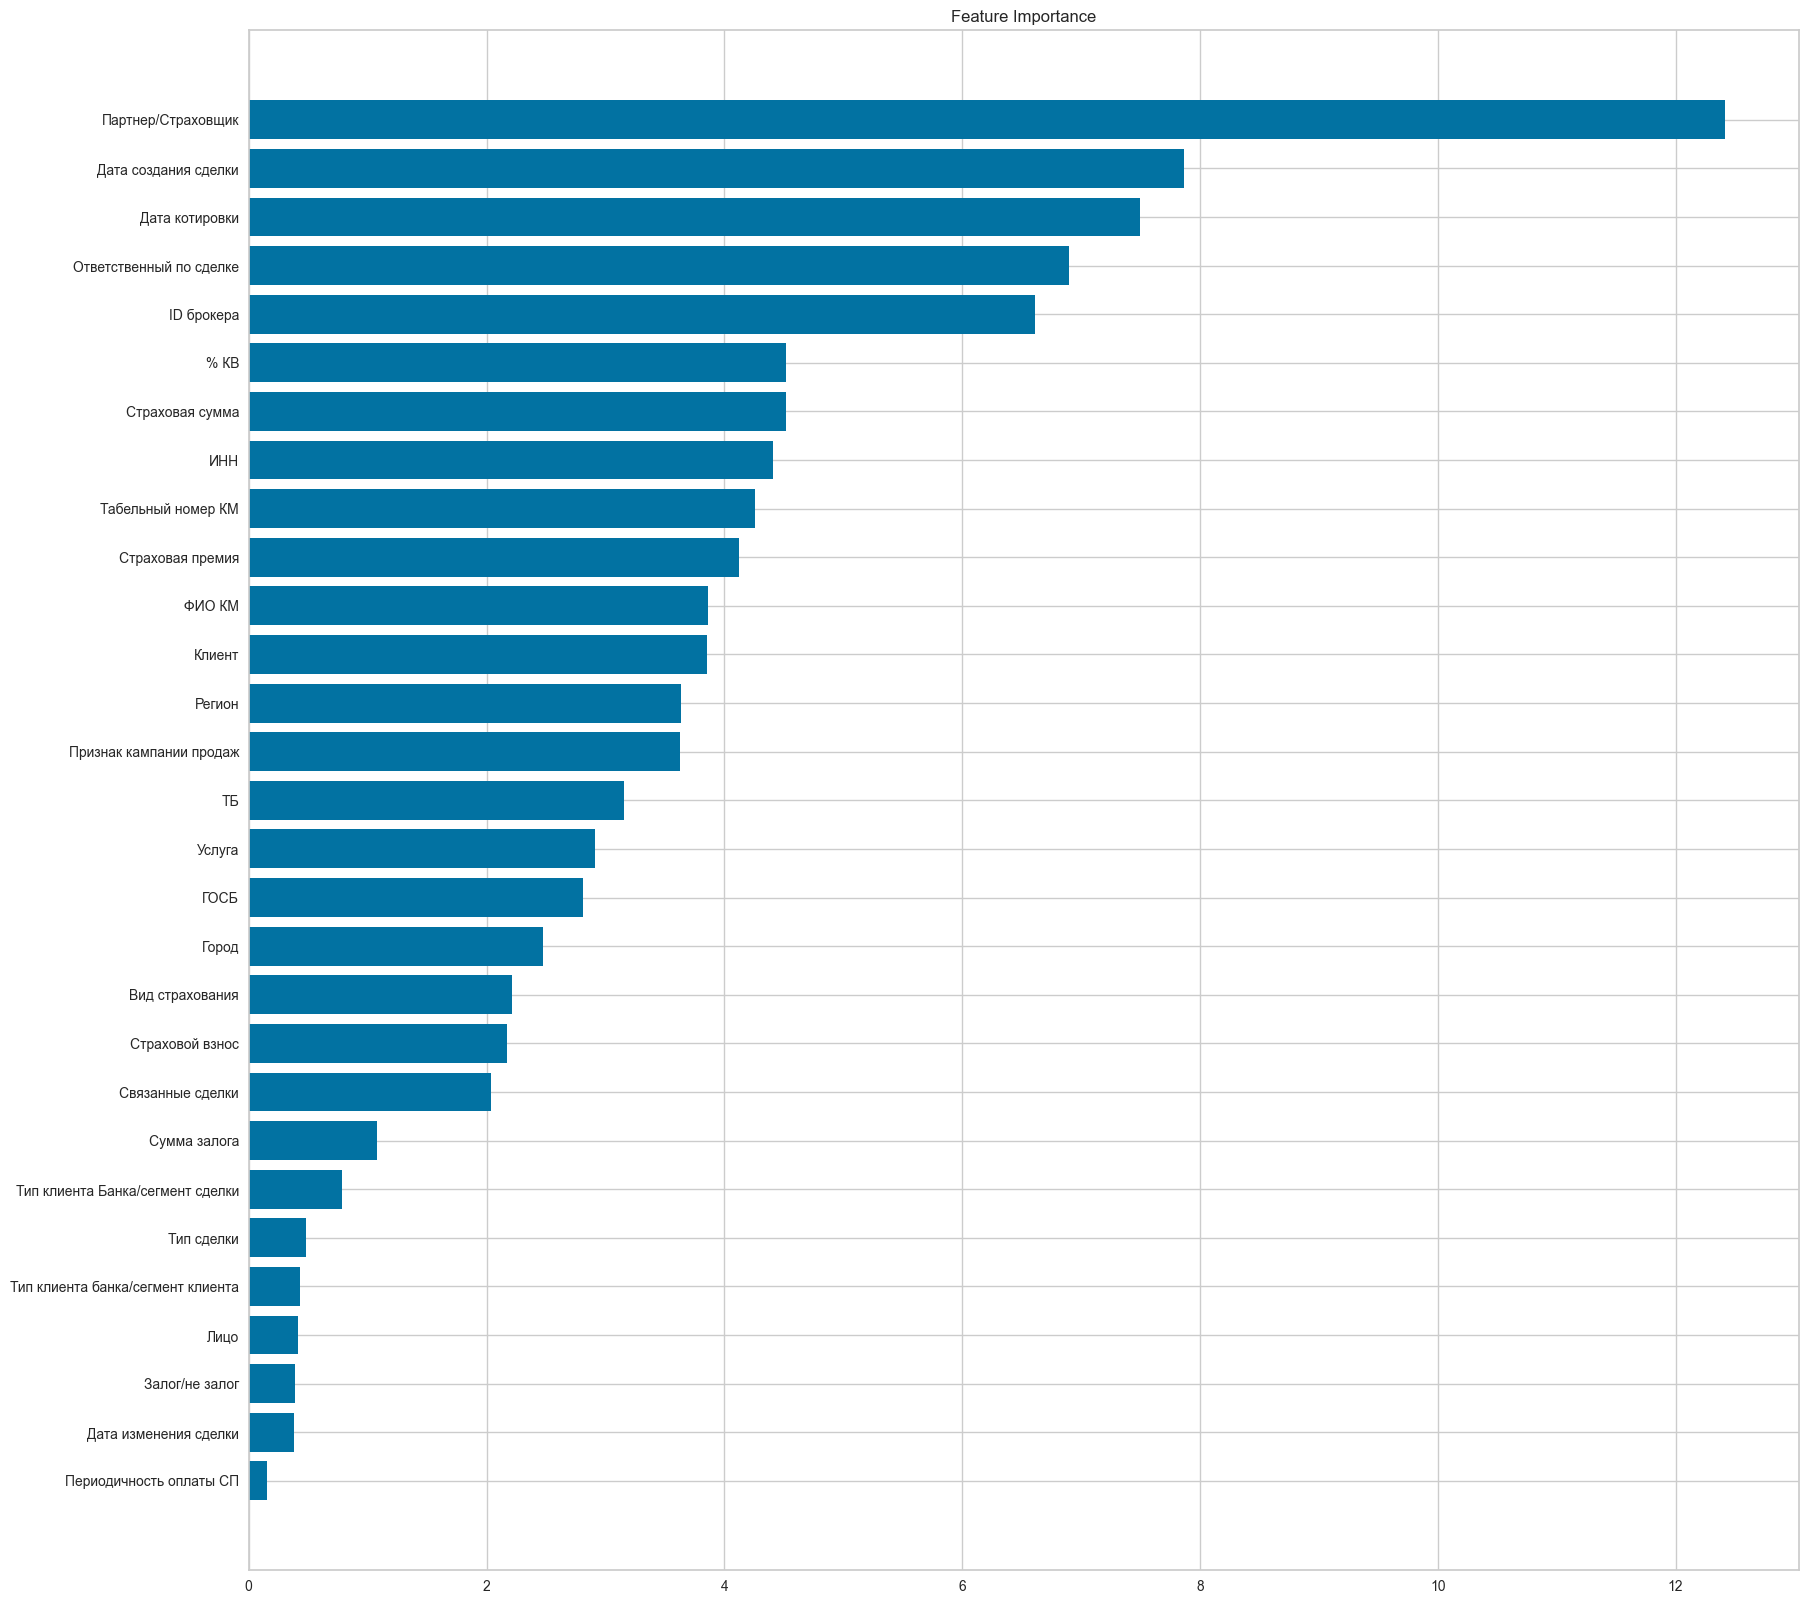

In [44]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.savefig('output.png')


In [64]:
X_w_target = x_train.copy()
X_w_target['Сделка'] = encoded_dataframe['Стадия сделки']
correlation_matrix_w_target = X_w_target.corr()
# correlation_matrix_w_target


In [ ]:
corr = X_w_target.corr()
va = corr.style.background_gradient(
    cmap='coolwarm', axis=None).set_precision(3)
dfi.export(va, 'successful_test.png')
# va


In [71]:
va.to_excel('output_corr.xlsx', engine='openpyxl')


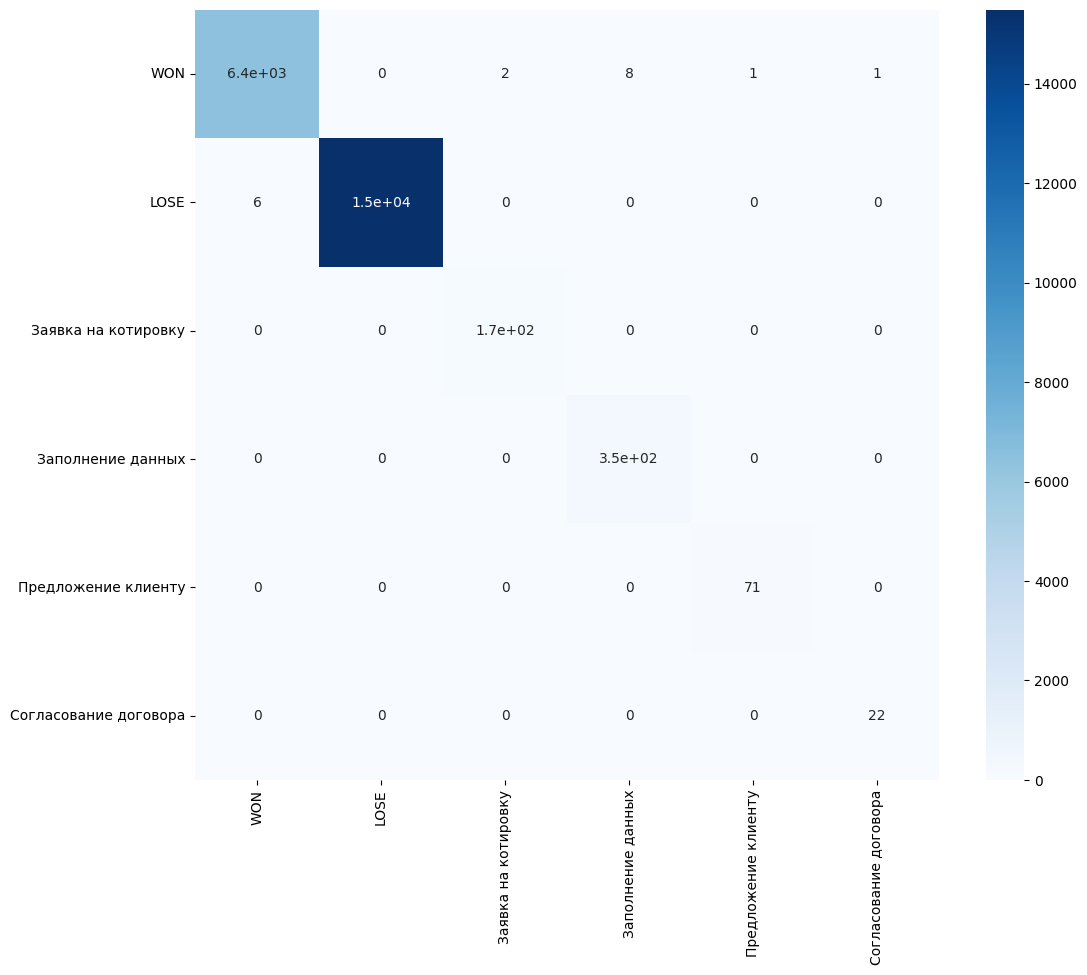

In [ ]:
preds = model.predict(X)

confusion_matr = confusion_matrix(y, preds)  # normalize = 'true'
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels=data_labels,
            yticklabels=data_labels)
#plt.savefig('prediction_matrix')


In [196]:
data_labels


['WON',
 'LOSE',
 'Заявка на котировку',
 'Заполнение данных',
 'Предложение клиенту',
 'Согласование договора']

In [ ]:
pred_proba = model.predict_proba(X)
check_dataframe = dataset.copy()
check_dataframe['predicted'] = target_encoder.inverse_transform(preds)
check_dataframe['WON'] = pred_proba[:, 1]
check_dataframe['LOSE'] = pred_proba[:, 0]
check_dataframe['Заявка на котировку'] = pred_proba[:, 3]
check_dataframe['Заполнение данных'] = pred_proba[:, 2]
check_dataframe['Предложение клиенту'] = pred_proba[:, 4]
check_dataframe['Согласование договора'] = pred_proba[:, 5]
check_dataframe.to_excel("catboost.xlsx")


In [49]:
check_dataframe


,Стадия сделки,Услуга,Связанные сделки,Статус платежа,ID платежа,Название платежа,Ответственный по сделке,ID брокера,Ответственный по платежу,Создал платеж,...,Комментарий Брокера,Доп Комментарий Брокера,asiiii,predicted,WON,LOSE,Заявка на котировку,Заполнение данных,Предложение клиенту,Согласование договора
418,WON,Прямое страхование,0.0,NaN,NaN,NaN,Рузанова Анна,1675,NaN,NaN,...,NaN,NaN,171146,WON,3.646175e-04,0.999769,1.171796e-09,3.367597e-12,1.631994e-14,7.162691e-15
422,WON,Прямое страхование,0.0,Оплачен,34458.0,Платеж по сделке ИМЩ ЮЛ_3812100526_Рожкова Евг...,Рожкова Евгения,1672,Рожкова Евгения,Рожкова Евгения,...,NaN,NaN,172772,LOSE,9.760042e-01,0.929007,1.358153e-11,4.355157e-15,1.364980e-10,1.233392e-15
431,WON,Прямое страхование,0.0,NaN,NaN,NaN,Рузанова Анна,1675,NaN,NaN,...,NaN,NaN,177166,WON,6.056606e-05,0.999993,2.417568e-09,5.294504e-12,2.715571e-15,2.788408e-15
432,WON,Прямое страхование,0.0,NaN,NaN,NaN,Рузанова Анна,1675,NaN,NaN,...,NaN,NaN,177180,WON,6.968481e-05,0.999996,3.346962e-09,2.055698e-12,3.339811e-15,3.388650e-15
437,WON,Прямое страхование,0.0,Оплачен,26046.0,Платеж по сделке ИМЩ ЮЛ__Семенкова Ольга_168_1...,Попова Олеся,1887,Семенкова Ольга,Семенкова Ольга,...,NaN,NaN,178400,WON,6.588430e-05,0.992338,2.442879e-08,5.099961e-08,3.756789e-12,5.141313e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45624,LOSE,Веб-витрина,0.0,Отклонен,796504.0,Платеж по сделке ИМЩ ЮЛ-КЕПКА_861005055686_Ган...,Ган Ольга,2608,Ган Ольга,Broker_Admin,...,NaN,NaN,789321,WON,3.300161e-04,0.990986,1.694197e-11,2.681055e-08,5.840264e-11,1.091167e-15
45625,LOSE,Прямое страхование,0.0,NaN,NaN,NaN,Ковальчук Наталья,1972,NaN,NaN,...,NaN,NaN,790537,LOSE,1.321982e-02,0.000541,9.727217e-08,7.530604e-10,1.730811e-10,1.273340e-12
45626,WON,Прямое страхование,0.0,Оплачен,797830.0,Платеж по сделке АВТОТР_8107010670_Барабаш Нат...,Барабаш Наталья,2361,Барабаш Наталья,Барабаш Наталья,...,Согласовано,NaN,790585,WON,5.527083e-08,0.971596,5.564309e-05,7.146615e-11,6.448855e-10,1.574025e-17
45627,LOSE,Прямое страхование,636808.0,NaN,NaN,NaN,Пятин Василий,1786,NaN,NaN,...,NaN,NaN,790920,WON,5.855729e-01,0.997299,4.736861e-14,9.260356e-13,2.393438e-16,4.799729e-13


In [ ]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="Стадия сделки", size=3)
plt.show()
plt.savefig('idk_what_it_is')


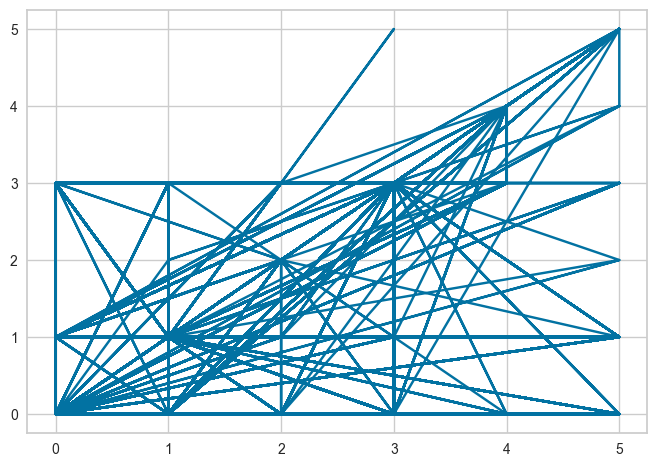

In [103]:
plt.plot(preds, y, animated=True)
plt.style.use('fivethirtyeight')


## Using Catboost directions Optuna


In [25]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)

    param = {
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss', 'CrossEntropy']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['F1', 'CrossEntropy']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1.00001, 17),
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0),  
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12),
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No', 'AnyImprovement']),
        'depth': trial.suggest_int('depth', 1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600, 1),

        # "used_ram_limit": "12gb",


    }

    if param['loss_function'] not in ["MultiCrossEntropy", "MultiLogloss", 'CrossEntropy']:
        param['auto_class_weights'] = trial.suggest_categorical(
            'auto_class_weights', ['None', 'Balanced', 'SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
        param['grow_policy'] = 'SymmetricTree'

    if param["boosting_type"] == "Plain":
        param['grow_policy'] = trial.suggest_categorical(
            'grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if param["grow_policy"] != "Lossguide":
        param['sampling_frequency'] = trial.suggest_categorical(
            'sampling_frequency', ['PerTree', 'PerTreeLevel'])

    if param["langevin"] == True:
        param["posterior_sampling"] = trial.suggest_categorical(
            'posterior_sampling', [True, False])

        if param["posterior_sampling"] == True:
            param['model_shrink_mode'] = 'Constant'

        else:
            param['model_shrink_mode'] = trial.suggest_categorical(
                'model_shrink_mode', ['Constant', 'Decreasing'])

    # END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param)
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    #preds = model.predict(test_x)

    #rmse = mean_squared_error(test_y, preds,squared=False)
    # return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(
        test_y, pred_labels)  # OR ROC_AUG OR accuracy_score

    preds_train = model.predict(train_x)
    pred_labels_train = np.rint(preds_train)

    joblib.dump(study, 'catboost_leads_directions.pkl')

    return accuracy, sklearn.metrics.accuracy_score(test_y, pred_labels), sklearn.metrics.balanced_accuracy_score(train_y, pred_labels_train), sklearn.metrics.accuracy_score(train_y, pred_labels_train)


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('catboost_leads_directions.pkl'):
    study = joblib.load('catboost_leads_directions.pkl')
else:
    sampler = optuna.multi_objective.samplers.MOTPEMultiObjectiveSampler()
    # ,pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study = optuna.create_study(
        directions=['maximize', 'maximize', 'maximize', 'maximize'], sampler=sampler)

study.optimize(objective, n_trials=1_000,  # gc_after_trial=True,
               show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])


In [25]:
study = joblib.load('catboost_leads_directions.pkl')


In [ ]:
optuna.visualization.plot_optimization_history(study)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)


In [ ]:
optuna.visualization.plot_slice(study)


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


Number of finished trials: 35
Best trial: {'loss_function': 'MultiLogloss', 'min_data_in_leaf': 2, 'bagging_temperature': 1.585664075268137, 'rsm': 0.5917735538697605, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6964507381860883, 'reg_lambda': 3.0755308956530776, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 5, 'allow_const_label': False, 'fold_len_multiplier': 11.767974350933722, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 4225, 'max_bin': 570, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree'}


In [ ]:
Best_trial = study.best_trial.params
Best_trial


{'loss_function': 'MultiLogloss',
 'min_data_in_leaf': 2,
 'bagging_temperature': 1.585664075268137,
 'rsm': 0.5917735538697605,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 2,
 'learning_rate': 0.6964507381860883,
 'reg_lambda': 3.0755308956530776,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'depth': 5,
 'allow_const_label': False,
 'fold_len_multiplier': 11.767974350933722,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': False,
 'iterations': 4225,
 'max_bin': 570,
 'grow_policy': 'SymmetricTree',
 'sampling_frequency': 'PerTree'}

In [ ]:
study.best_trial.value


0.9998986544428333

In [ ]:
model = cb.CatBoostClassifier()


In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)


In [ ]:
model.get_feature_importance


In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
cat_iris_imp = pd.Series(model.get_feature_importance(),
                         df.drop(['opened'], axis=1).columns)
fig, ax = plt.subplots(figsize=(20, 20))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()


## Using Catboost CV Optuna


In [98]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)

    param = {
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss', 'CrossEntropy']),

        'eval_metric': trial.suggest_categorical('eval_metric', ['F1', 'CrossEntropy', "MCC", "BalancedAccuracy"]),

        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 1.00001, 17),
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0),  
        'fold_permutation_block': trial.suggest_int('fold_permutation_block', 1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12),
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No', 'AnyImprovement']),
        'depth': trial.suggest_int('depth', 1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 1_000, 1),
        'verbose': 0
        # "used_ram_limit": "12gb",

    }

    # """
    if param['loss_function'] not in ["MultiCrossEntropy", "MultiLogloss", 'CrossEntropy']:
        param['auto_class_weights'] = trial.suggest_categorical(
            'auto_class_weights', ['None', 'Balanced', 'SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
        param['grow_policy'] = 'SymmetricTree'

    if param["boosting_type"] == "Plain":
        param['grow_policy'] = trial.suggest_categorical(
            'grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if param["grow_policy"] != "Lossguide":
        param['sampling_frequency'] = trial.suggest_categorical(
            'sampling_frequency', ['PerTree', 'PerTreeLevel'])

    if param["langevin"] == True:
        param["posterior_sampling"] = trial.suggest_categorical(
            'posterior_sampling', [True, False])

        if param["posterior_sampling"] == True:
            param['model_shrink_mode'] = 'Constant'

        else:
            param['model_shrink_mode'] = trial.suggest_categorical(
                'model_shrink_mode', ['Constant', 'Decreasing'])

    # END OF SETTINGS
    # """
    print(param)
    model = cb.CatBoostClassifier(**param)

    joblib.dump(study, 'catboost_deals_CV.pkl')

    if (param['eval_metric'] == "F1"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=-1))
    if (param['eval_metric'] == "BalancedAccuracy"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='balanced_accuracy', n_jobs=-1))
    if (param['eval_metric'] == "MCC"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='matthews_corrcoef', n_jobs=-1))
    if (param['eval_metric'] == "CrossEntropy"):
        return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='neg_log_loss', n_jobs=-1))+1

    # return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=-1))
    # scores = sklearn.model_selection.cross_validate(model, X, y, cv=10, scoring="f1", n_jobs=-1)
    # print(scores['test_score'])
    # return statistics.mean(scores['test_score'])


In [99]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('catboost_deals_CV.pkl'):
    study = joblib.load('catboost_deals_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)

study.optimize(objective, n_trials=1_000,  # gc_after_trial=True,
               show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])


In [49]:
study = joblib.load('catboost_deals_CV.pkl')


In [50]:
optuna.visualization.plot_optimization_history(study)


In [51]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-22 15:16:36,409] Your study has only completed trials with missing parameters.


In [47]:
optuna.visualization.plot_slice(study)


[W 2022-10-31 13:25:59,831] Your study does not have any completed trials.


In [52]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)


Number of finished trials: 20
Best trial: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 1, 'bagging_temperature': 12.909581790979116, 'rsm': 0.6596207511978085, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 1, 'learning_rate': 0.25913725705228424, 'reg_lambda': 10.895644240207025, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': False, 'fold_len_multiplier': 8.153351177359424, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 5302, 'max_bin': 994, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTree'}


In [53]:
Best_trial = study.best_trial.params
Best_trial


{'loss_function': 'Logloss',
 'eval_metric': 'BalancedAccuracy',
 'min_data_in_leaf': 1,
 'bagging_temperature': 12.909581790979116,
 'rsm': 0.6596207511978085,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 1,
 'learning_rate': 0.25913725705228424,
 'reg_lambda': 10.895644240207025,
 'leaf_estimation_backtracking': 'No',
 'depth': 6,
 'allow_const_label': False,
 'fold_len_multiplier': 8.153351177359424,
 'score_function': 'L2',
 'boosting_type': 'Ordered',
 'langevin': False,
 'iterations': 5302,
 'max_bin': 994,
 'auto_class_weights': 'SqrtBalanced',
 'sampling_frequency': 'PerTree'}

In [54]:
study.best_trial.value


0.972798376169896

In [55]:
model = cb.CatBoostClassifier()


In [56]:
model.set_params(**study.best_params)
model.fit(X, y)


0:	learn: 0.9332322	total: 383ms	remaining: 33m 50s
1:	learn: 0.9333287	total: 618ms	remaining: 27m 17s
2:	learn: 0.9335003	total: 791ms	remaining: 23m 17s
3:	learn: 0.9330206	total: 1.03s	remaining: 22m 43s
4:	learn: 0.9367893	total: 1.26s	remaining: 22m 14s
5:	learn: 0.9370185	total: 1.64s	remaining: 24m 5s
6:	learn: 0.9383895	total: 1.87s	remaining: 23m 34s
7:	learn: 0.9389679	total: 2.09s	remaining: 23m 4s
8:	learn: 0.9394028	total: 2.35s	remaining: 22m 59s
9:	learn: 0.9392345	total: 2.58s	remaining: 22m 44s
10:	learn: 0.9395145	total: 2.82s	remaining: 22m 35s
11:	learn: 0.9397821	total: 2.95s	remaining: 21m 41s
12:	learn: 0.9400084	total: 3.2s	remaining: 21m 42s
13:	learn: 0.9405001	total: 3.45s	remaining: 21m 41s
14:	learn: 0.9406026	total: 3.61s	remaining: 21m 12s
15:	learn: 0.9406974	total: 3.74s	remaining: 20m 36s
16:	learn: 0.9412321	total: 3.99s	remaining: 20m 40s
17:	learn: 0.9412629	total: 4.2s	remaining: 20m 32s
18:	learn: 0.9414172	total: 4.32s	remaining: 20m
19:	learn: 

Text(0.5, 1.0, 'Feature Importance')

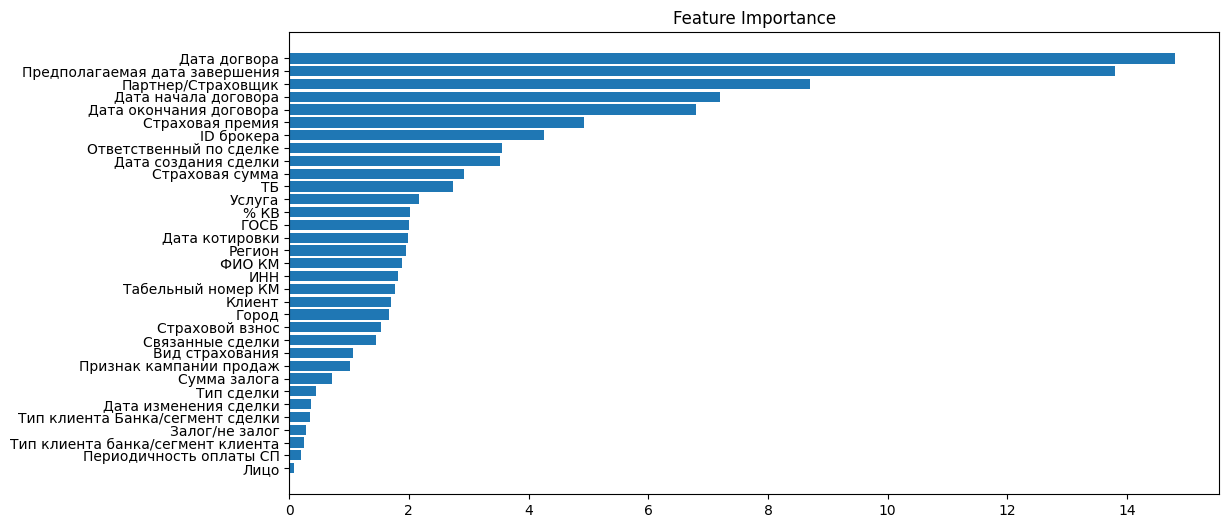

In [57]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
# Remove first 4 dates


## LightGBM with CV


In [39]:
def objective(trial, data=X, target=y):

    train_x, test_x, train_y, test_y = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=y)
    kf = StratifiedKFold(n_splits=5)

    param = {

        'objective': trial.suggest_categorical('objective', ['multiclass', 'goss', 'rf']), # 

        'metric': trial.suggest_categorical('metric', ['multiclass', 'multiclassova','auc_mu']), #
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']), #

        'num_leaves': trial.suggest_int('num_leaves', 2, 70),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 7000),
        'min_split_gain': trial.suggest_float('min_split_gain', 0, 5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-5, 5),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 70),
        
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-5, 1),
        'importance_type': trial.suggest_categorical('importance_type', ['split', 'gain']),

        'num_iterations': trial.suggest_int('num_iterations', 1000, 5000),

        'deterministic': trial.suggest_categorical('deterministic', ['true', 'false']),
        'extra_trees': trial.suggest_categorical('extra_trees', ['true', 'false']),

        'max_bin': trial.suggest_int('max_bin', 255, 700),

    }

    if (param["objective"] != "goss" and param["boosting_type"] != "goss"):
        param['subsample']= trial.suggest_float('subsample', 1e-5, 1)  
        param['subsample_freq']= trial.suggest_int('subsample_freq', -2, 20)

    print(param)
    model = lgbm.LGBMClassifier(**param)
    model.fit(train_x, train_y, eval_set=[
              (test_x, test_y)], early_stopping_rounds=500, verbose=False)

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    #accuracy = statistics.mean(sklearn.model_selection.cross_val_score(model, test_x, test_y, cv = kf, scoring = 'balanced_accuracy'))
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, preds)


    joblib.dump(study, 'lightGBM_deals.pkl')

    return accuracy


In [40]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
                frozen_trial.number,
                frozen_trial.value,
                frozen_trial.params,
            )
        )


In [ ]:
%%time

if os.path.isfile('lightGBM_deals.pkl'):
    print("Found file")
    study = joblib.load('lightGBM_deals.pkl')
else:
    sampler = optuna.samplers.TPESampler(
        multivariate=True, warn_independent_sampling=False)
    study = optuna.create_study(
        direction='maximize', load_if_exists=True, sampler=sampler)

study.optimize(objective, n_trials=1_000, gc_after_trial=True,
               show_progress_bar=True, n_jobs=1, callbacks=[logging_callback])
joblib.dump(study, 'lightGBM_deals.pkl')


In [81]:
study = joblib.load(
    r'C:\Users\NONE\Desktop\WORK\MultipleDeals\lightGBM_deals.pkl')


In [82]:
Best_trial = study.best_trial.params
Best_trial


{'objective': 'rf',
 'metric': 'multi_logloss',
 'boosting_type': 'dart',
 'num_leaves': 68,
 'learning_rate': 0.7789546586810484,
 'n_estimators': 1241,
 'min_split_gain': 1.7268053658709843,
 'min_child_weight': 3.5680207968168576,
 'min_child_samples': 13,
 'colsample_bytree': 0.9394892642731384,
 'importance_type': 'gain',
 'num_iterations': 3551,
 'deterministic': 'true',
 'extra_trees': 'false',
 'max_bin': 303,
 'subsample': 0.7827023728620808,
 'subsample_freq': 8}

In [83]:
study.best_trial.value


0.7337403946144506

In [84]:
model = lgbm.LGBMClassifier()


In [ ]:
%%time
model.set_params(**study.best_params)
model.fit(X, y)


In [88]:
model.booster_.save_model('goal-LGBM.json')


In [129]:
model = lgbm.Booster(model_file='goal-LGBM.json')


In [ ]:
sklearn.model_selection.cross_val_score(
    model, X, y, cv=10, scoring='f1_weighted', n_jobs=-1)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_train, y_train, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9375049540766712

In [ ]:
statistics.mean(sklearn.model_selection.cross_val_score(
    model, x_test, y_test, cv=10, scoring='f1_weighted', n_jobs=-1))


0.9296217854616242

In [ ]:
model.get_feature_importance


<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x000002062AB40490>>

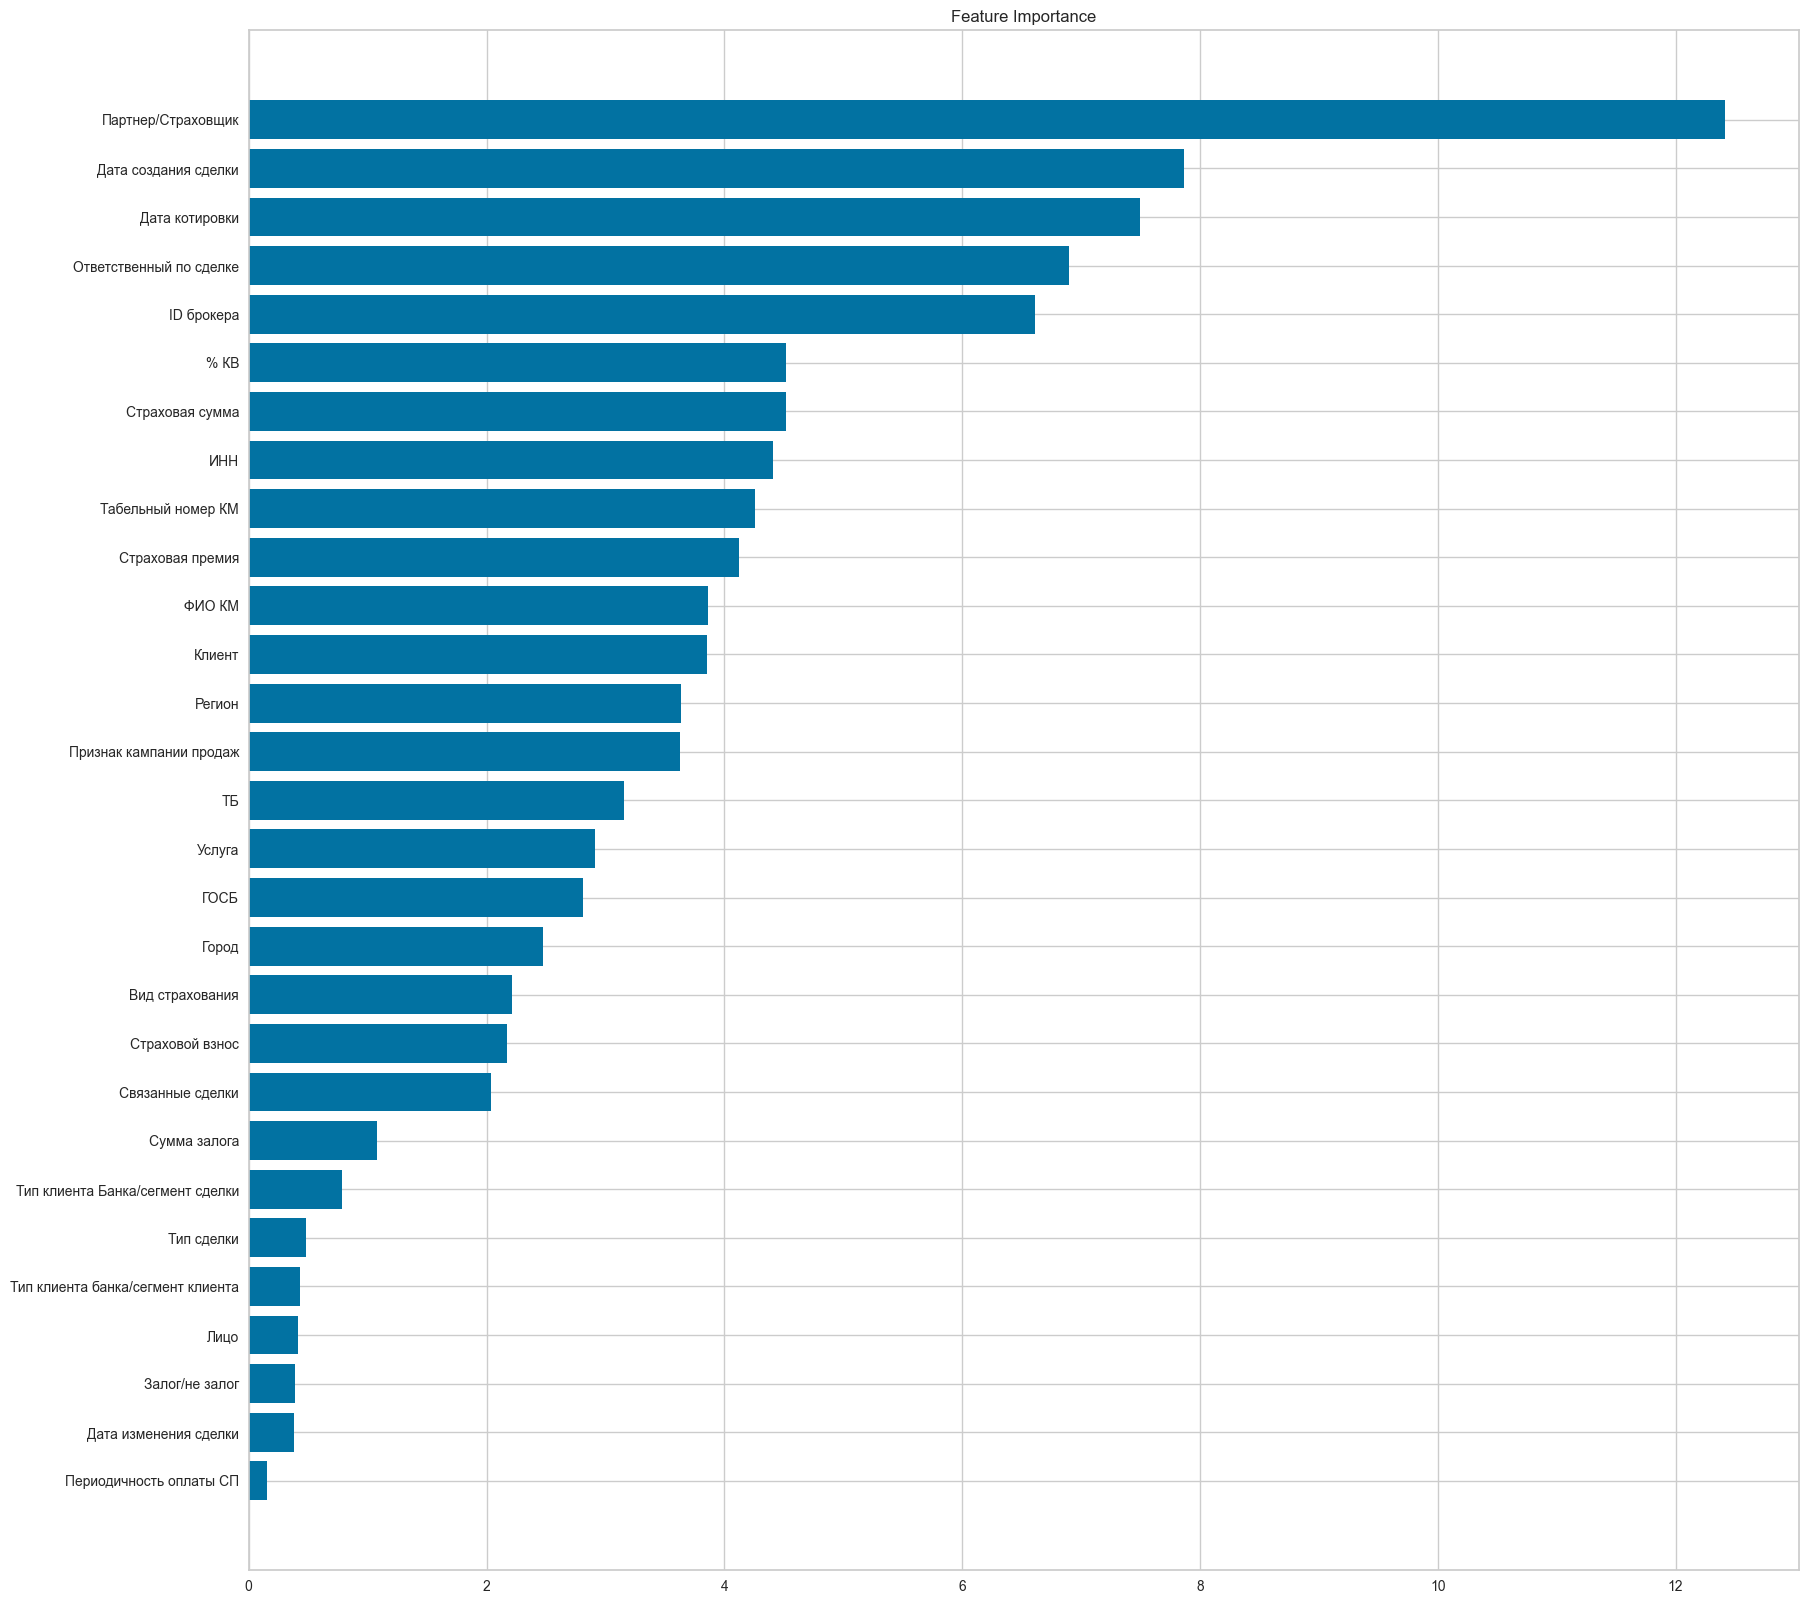

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)),
         feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.savefig('output.png')


In [ ]:
X_w_target = x_train.copy()
X_w_target['Сделка'] = encoded_dataframe['Стадия сделки']
correlation_matrix_w_target = X_w_target.corr()
# correlation_matrix_w_target


In [ ]:
corr = X_w_target.corr()
va = corr.style.background_gradient(
    cmap='coolwarm', axis=None).set_precision(3)
dfi.export(va, 'successful_test.png')
# va


In [ ]:
va.to_excel('output_corr.xlsx', engine='openpyxl')


In [ ]:
preds = model.predict(X, predict_disable_shape_check=True)

confusion_matr = confusion_matrix(y, preds)  # normalize = 'true'
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels=data_labels,
            yticklabels=data_labels)
#plt.savefig('prediction_matrix')


In [ ]:
data_labels


['WON',
 'LOSE',
 'Заявка на котировку',
 'Заполнение данных',
 'Предложение клиенту',
 'Согласование договора']

In [ ]:
pred_proba = model.predict_proba(X,, predict_disable_shape_check=True)
check_dataframe = dataset.copy()
check_dataframe['predicted'] = target_encoder.inverse_transform(preds)
check_dataframe['WON'] = pred_proba[:, 1]
check_dataframe['LOSE'] = pred_proba[:, 0]
check_dataframe['Заявка на котировку'] = pred_proba[:, 3]
check_dataframe['Заполнение данных'] = pred_proba[:, 2]
check_dataframe['Предложение клиенту'] = pred_proba[:, 4]
check_dataframe['Согласование договора'] = pred_proba[:, 5]
check_dataframe.to_excel("lgbm_GOAL-2052.xlsx")


In [ ]:
check_dataframe


,Стадия сделки,Услуга,Связанные сделки,Статус платежа,ID платежа,Название платежа,Ответственный по сделке,ID брокера,Ответственный по платежу,Создал платеж,...,Комментарий Брокера,Доп Комментарий Брокера,asiiii,predicted,WON,LOSE,Заявка на котировку,Заполнение данных,Предложение клиенту,Согласование договора
418,WON,Прямое страхование,0.0,NaN,NaN,NaN,Рузанова Анна,1675,NaN,NaN,...,NaN,NaN,171146,WON,3.646175e-04,0.999769,1.171796e-09,3.367597e-12,1.631994e-14,7.162691e-15
422,WON,Прямое страхование,0.0,Оплачен,34458.0,Платеж по сделке ИМЩ ЮЛ_3812100526_Рожкова Евг...,Рожкова Евгения,1672,Рожкова Евгения,Рожкова Евгения,...,NaN,NaN,172772,LOSE,9.760042e-01,0.929007,1.358153e-11,4.355157e-15,1.364980e-10,1.233392e-15
431,WON,Прямое страхование,0.0,NaN,NaN,NaN,Рузанова Анна,1675,NaN,NaN,...,NaN,NaN,177166,WON,6.056606e-05,0.999993,2.417568e-09,5.294504e-12,2.715571e-15,2.788408e-15
432,WON,Прямое страхование,0.0,NaN,NaN,NaN,Рузанова Анна,1675,NaN,NaN,...,NaN,NaN,177180,WON,6.968481e-05,0.999996,3.346962e-09,2.055698e-12,3.339811e-15,3.388650e-15
437,WON,Прямое страхование,0.0,Оплачен,26046.0,Платеж по сделке ИМЩ ЮЛ__Семенкова Ольга_168_1...,Попова Олеся,1887,Семенкова Ольга,Семенкова Ольга,...,NaN,NaN,178400,WON,6.588430e-05,0.992338,2.442879e-08,5.099961e-08,3.756789e-12,5.141313e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45624,LOSE,Веб-витрина,0.0,Отклонен,796504.0,Платеж по сделке ИМЩ ЮЛ-КЕПКА_861005055686_Ган...,Ган Ольга,2608,Ган Ольга,Broker_Admin,...,NaN,NaN,789321,WON,3.300161e-04,0.990986,1.694197e-11,2.681055e-08,5.840264e-11,1.091167e-15
45625,LOSE,Прямое страхование,0.0,NaN,NaN,NaN,Ковальчук Наталья,1972,NaN,NaN,...,NaN,NaN,790537,LOSE,1.321982e-02,0.000541,9.727217e-08,7.530604e-10,1.730811e-10,1.273340e-12
45626,WON,Прямое страхование,0.0,Оплачен,797830.0,Платеж по сделке АВТОТР_8107010670_Барабаш Нат...,Барабаш Наталья,2361,Барабаш Наталья,Барабаш Наталья,...,Согласовано,NaN,790585,WON,5.527083e-08,0.971596,5.564309e-05,7.146615e-11,6.448855e-10,1.574025e-17
45627,LOSE,Прямое страхование,636808.0,NaN,NaN,NaN,Пятин Василий,1786,NaN,NaN,...,NaN,NaN,790920,WON,5.855729e-01,0.997299,4.736861e-14,9.260356e-13,2.393438e-16,4.799729e-13
